

---

## 📘 What is Support Vector Machine (SVM)?

**Support Vector Machine** is a **supervised machine learning algorithm** used for **classification** and sometimes **regression**.

It finds the **best boundary (called a hyperplane)** that separates classes in the dataset. The goal is to **maximize the margin** between different classes.

---

## 🧠 Core Idea:

* SVM creates a **decision boundary** that separates classes.
* It tries to **maximize the distance (margin)** between the nearest data points (called **support vectors**) and the decision boundary.

### ✅ Margin = the distance between the hyperplane and the closest data points

The larger the margin, the better the generalization.

---

## 📦 Where Is SVM Used?

SVM is used in real-world applications like:

| Use Case            | Example                               |
| ------------------- | ------------------------------------- |
| Text Classification | Spam detection, sentiment analysis    |
| Image Recognition   | Handwriting recognition (e.g. MNIST)  |
| Bioinformatics      | Cancer diagnosis from gene expression |
| Face Detection      | Detecting faces in security systems   |
| Fraud Detection     | Identifying suspicious transactions   |

---

## 🎯 Why Is It Important?

| Reason                          | Benefit                                                         |
| ------------------------------- | --------------------------------------------------------------- |
| 🔍 Effective in high dimensions | Works well when you have many features (e.g., text, images)     |
| 🧱 Versatile                    | Can handle linear and non-linear classification                 |
| 🧪 Robust                       | Focuses on boundary cases (support vectors), not entire dataset |
| 🧠 Powerful with kernels        | Can project data into higher dimensions to make it separable    |

---

## 🧪 Types of SVM

### 1️⃣ **Linear SVM**

* Used when data is **linearly separable**
* Finds a straight line (or hyperplane) to separate classes

### 2️⃣ **Non-Linear SVM**

* Used when data **can’t be separated by a straight line**
* Applies **Kernel Tricks** to transform data into a higher-dimensional space

---

## 🧩 Popular Kernel Functions (for Non-Linear SVM)

| Kernel         | Description                               |
| -------------- | ----------------------------------------- |
| Linear         | Straight-line separation                  |
| Polynomial     | Curved decision boundary (poly functions) |
| RBF (Gaussian) | Very common; handles complex shapes       |
| Sigmoid        | Used in neural networks                   |

---

## 🧭 Steps in Building an SVM Model

### 1️⃣ **Import Libraries & Load Data**

```python
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
```

---

### 2️⃣ **Split the Dataset**

```python
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

---

### 3️⃣ **Train the SVM Model**

```python
model = SVC(kernel='linear')  # or 'rbf', 'poly'
model.fit(X_train, y_train)
```

---

### 4️⃣ **Make Predictions**

```python
y_pred = model.predict(X_test)
```

---

### 5️⃣ **Evaluate the Model**

```python
print("Accuracy:", accuracy_score(y_test, y_pred))
```

---

## 🧾 Summary

| Feature        | Description                                  |
| -------------- | -------------------------------------------- |
| Type           | Supervised (Classification & Regression)     |
| Best For       | Binary or multiclass classification problems |
| Core Concept   | Maximize margin between classes              |
| Handles        | Linear & Non-linear problems                 |
| Common Kernels | Linear, Polynomial, RBF, Sigmoid             |
| Sensitive To   | Choice of kernel and hyperparameters         |

---



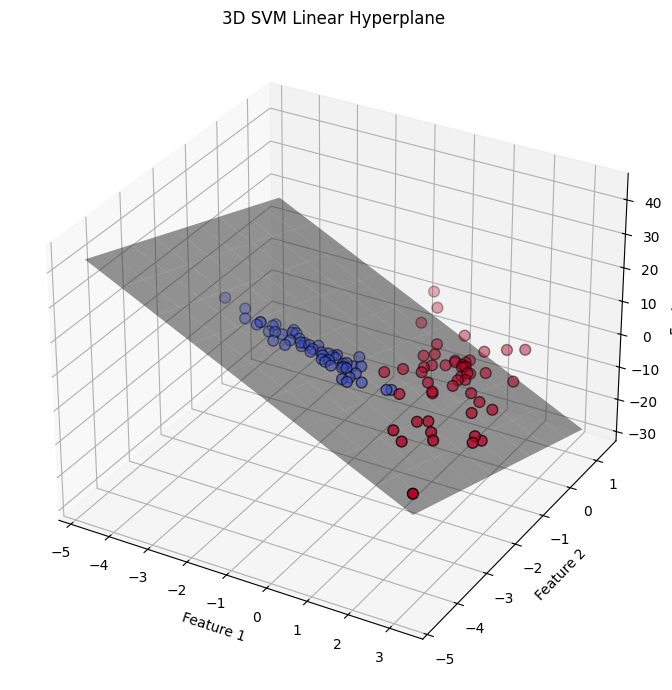

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate synthetic 3D data
X, y = make_classification(n_samples=100, n_features=3, 
                           n_informative=3, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5,
                           random_state=42)

# 2. Fit SVM with linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# 3. Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 4. Plot points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=60, edgecolors='k')

# 5. Create mesh grid to plot the hyperplane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))

# Calculate the corresponding z (3rd dimension) using the SVM coefficients
# Equation of the plane: w1*x + w2*y + w3*z + b = 0 => solve for z
coef = clf.coef_[0]
intercept = clf.intercept_[0]
z = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

# 6. Plot the hyperplane
ax.plot_surface(xx, yy, z, color='gray', alpha=0.5)

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D SVM Linear Hyperplane')

plt.tight_layout()
plt.show()
